In [1]:
#installing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.datasets as dt
import statsmodels.api as sm
import datetime as dm
import seaborn as sns
import random as rnd
from statsmodels.sandbox.tools import cross_val
%matplotlib inline

C:\Users\JAINMOD\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#data structure
s = pd.Series([1,2,3,np.NaN,7,9])
s

0    1.0
1    2.0
2    3.0
3    NaN
4    7.0
5    9.0
dtype: float64

In [3]:
dates = pd.date_range('20170701',periods=5)
dates

DatetimeIndex(['2017-07-01', '2017-07-02', '2017-07-03', '2017-07-04',
               '2017-07-05'],
              dtype='datetime64[ns]', freq='D')

In [4]:
dates_yr = pd.date_range('20160701',periods=365)
dates_yr

DatetimeIndex(['2016-07-01', '2016-07-02', '2016-07-03', '2016-07-04',
               '2016-07-05', '2016-07-06', '2016-07-07', '2016-07-08',
               '2016-07-09', '2016-07-10',
               ...
               '2017-06-21', '2017-06-22', '2017-06-23', '2017-06-24',
               '2017-06-25', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', length=365, freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(8,5))
df

,0,1,2,3,4
0,0.177457,-0.316962,-0.729632,-0.284402,0.517111
1,0.017742,0.929530,-1.188592,-1.528420,-0.005843
2,0.459113,0.867187,-0.780731,-0.022538,0.471508
3,0.331711,-0.684233,-0.528377,1.530443,0.188251
4,0.857346,0.163641,-0.327374,-0.137793,0.351486
5,-0.843551,1.062380,-0.096677,0.782651,0.722801
6,-0.496278,-1.629102,0.233982,-0.956126,1.282064
7,0.890253,0.541023,0.697061,-0.615762,0.661607


In [6]:
# Creating Data frame by using index and colum names
df1 = pd.DataFrame(np.random.randn(5,5), index =dates, columns =list('ABCDE'))
df1
df2 = pd.DataFrame(np.random.randn(5,5), index = ['Blue','Orange','Pink','Red','Purple'], columns =list('ABCDE'))
df2


,A,B,C,D,E
Blue,0.468372,-0.367737,-1.158740,-0.776098,-0.831407
Orange,-0.716689,0.760461,-0.796580,2.098923,-0.402990
Pink,-1.322592,1.394996,-0.077110,-2.665668,0.091430
Red,-1.020958,-1.120131,0.955222,-0.241717,-0.142296
Purple,-0.879575,0.132138,-1.474792,-0.285937,1.593021


In [7]:
# Strings
string = 'Hello'
if 'H' and 'f' in string :
    print('It is available')
else :
    print('Not there')

Not there


In [8]:
s1 = pd.Series(np.random.randn(5),name = "Testing")
s1


0   -1.190555
1   -2.308450
2    0.237444
3   -0.096387
4   -2.188706
Name: Testing, dtype: float64

In [9]:
#importing Boston data for Analysis
input_raw = dt.get_rdataset("Boston", "MASS").data
input_raw.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
#Importing HR Analytcs dataset
pay_equity = pd.read_csv('C:/Users/JAINMOD/Desktop/Respiratory/Python Learning/data.csv')
pay_equity.head()

,Emp_ID,Division,Site,Family,Band,Gender,DOJ,Comp
0,1,PHARMA,CADO,Sales,4,Male,10/24/2016,92679.36127
1,2,PHARMA,CADO,Sales,3,Male,9/9/2002,149186.59570
2,3,PHARMA,CADO,Sales,4,Male,10/9/2007,145547.56730
3,4,PHARMA,CADO,Sales,6,Female,1/6/1997,113265.97200
4,5,PHARMA,CADO,Sales,4,Male,3/5/2001,142829.44750


In [11]:
#Creating a conditional column
pay_equity['Male'] = np.where(pay_equity['Gender'] == "Male",1,0)
pay_equity.head()
pay_equity_new = pay_equity.copy()
pay_equity_new=pay_equity_new.drop(['Gender'], axis =1)
pay_equity_new.head()

,Emp_ID,Division,Site,Family,Band,DOJ,Comp,Male
0,1,PHARMA,CADO,Sales,4,10/24/2016,92679.36127,1
1,2,PHARMA,CADO,Sales,3,9/9/2002,149186.59570,1
2,3,PHARMA,CADO,Sales,4,10/9/2007,145547.56730,1
3,4,PHARMA,CADO,Sales,6,1/6/1997,113265.97200,0
4,5,PHARMA,CADO,Sales,4,3/5/2001,142829.44750,1


In [12]:
# dropping rows
pay_equity_new=pay_equity_new.drop(pay_equity_new.index[3:8])
pay_equity_new.head()

,Emp_ID,Division,Site,Family,Band,DOJ,Comp,Male
0,1,PHARMA,CADO,Sales,4,10/24/2016,92679.36127,1
1,2,PHARMA,CADO,Sales,3,9/9/2002,149186.59570,1
2,3,PHARMA,CADO,Sales,4,10/9/2007,145547.56730,1
8,9,ONCOLOGY,CADO,Sales,5,9/2/2002,105427.81690,0
9,10,SANDOZ,CABV,Sales,3,9/28/2009,199508.53890,1


In [13]:
# creating calculaed clomn using date function
pay_equity['today'] = pd.to_datetime(dm.date.today())
pay_equity['Tenure'] = pay_equity['today'] - pd.to_datetime(pay_equity['DOJ'])
pay_equity['Tenure_yr'] = (pay_equity['Tenure'])/np.timedelta64(365, 'D')
pay_equity2 = pay_equity.drop(['today','Tenure'], axis=1)
pay_equity3 =pay_equity2.rename(columns ={'Tenure_yr' : 'Tenure'})
pay_equity3

,Emp_ID,Division,Site,Family,Band,Gender,DOJ,Comp,Male,Tenure
0,1,PHARMA,CADO,Sales,4,Male,10/24/2016,92679.36127,1,0.791781
1,2,PHARMA,CADO,Sales,3,Male,9/9/2002,149186.59570,1,14.926027
2,3,PHARMA,CADO,Sales,4,Male,10/9/2007,145547.56730,1,9.841096
3,4,PHARMA,CADO,Sales,6,Female,1/6/1997,113265.97200,0,20.602740
4,5,PHARMA,CADO,Sales,4,Male,3/5/2001,142829.44750,1,16.441096
5,6,PHARMA,CADO,Sales,4,Female,12/15/2008,146712.78210,0,8.654795
6,7,PHARMA,CADO,Sales,4,Male,11/26/2001,147855.97120,1,15.712329
7,8,SANDOZ,CABV,Sales,3,Male,4/14/2008,161103.65090,1,9.326027
8,9,ONCOLOGY,CADO,Sales,5,Female,9/2/2002,105427.81690,0,14.945205
9,10,SANDOZ,CABV,Sales,3,Male,9/28/2009,199508.53890,1,7.868493


In [14]:
#grouping by 
pay_equity4 = pay_equity3.groupby(['Male','Band']).sum()
pay_equity5 = pay_equity3.groupby(['Male']).agg({'Comp':[np.sum,np.mean]})
pay_equity5

Comp               
               sum           mean
Male                             
0     2.073115e+07   90529.049147
1     2.348436e+07  107234.528669

In [15]:
#Transpose 
pay_equity4.T

Male                0                                                          \
Band                3             4             5             6             7   
Emp_ID     200.000000  1.933000e+03  4.720000e+03  3.850000e+04  7.366000e+03   
Comp    159622.291800  1.848062e+06  3.023134e+06  1.445943e+07  1.240908e+06   
Tenure      14.082192  1.454932e+02  2.857068e+02  1.125356e+03  2.562027e+02   

Male                1                                                          \
Band                1             3             4             5             6   
Emp_ID     405.000000  1.252000e+03  3.867000e+03  7.079000e+03  3.491100e+04   
Comp    244075.326500  1.499103e+06  3.144559e+06  4.560186e+06  1.399847e+07   
Tenure       1.156164  7.510685e+01  2.085616e+02  3.928795e+02  1.115384e+03   

Male                  
Band               7  
Emp_ID    343.000000  
Comp    37973.371320  
Tenure      2.306849

In [16]:
#to filter using isin needs to check again
pay_equity6 = pay_equity3.copy()
chk = pay_equity6[pay_equity3['Division'].isin(['SANDOZ','PHARMA'])]
chk

,Emp_ID,Division,Site,Family,Band,Gender,DOJ,Comp,Male,Tenure
0,1,PHARMA,CADO,Sales,4,Male,10/24/2016,92679.36127,1,0.791781
1,2,PHARMA,CADO,Sales,3,Male,9/9/2002,149186.59570,1,14.926027
2,3,PHARMA,CADO,Sales,4,Male,10/9/2007,145547.56730,1,9.841096
3,4,PHARMA,CADO,Sales,6,Female,1/6/1997,113265.97200,0,20.602740
4,5,PHARMA,CADO,Sales,4,Male,3/5/2001,142829.44750,1,16.441096
5,6,PHARMA,CADO,Sales,4,Female,12/15/2008,146712.78210,0,8.654795
6,7,PHARMA,CADO,Sales,4,Male,11/26/2001,147855.97120,1,15.712329
7,8,SANDOZ,CABV,Sales,3,Male,4/14/2008,161103.65090,1,9.326027
9,10,SANDOZ,CABV,Sales,3,Male,9/28/2009,199508.53890,1,7.868493
10,11,PHARMA,CADO,Sales,4,Male,2/17/1997,138643.79640,1,20.487671


In [17]:
#cumulatice sum
pay_equity3['Cum_Comp'] = pay_equity3.Comp.cumsum()
pay_equity3

,Emp_ID,Division,Site,Family,Band,Gender,DOJ,Comp,Male,Tenure,Cum_Comp
0,1,PHARMA,CADO,Sales,4,Male,10/24/2016,92679.36127,1,0.791781,9.267936e+04
1,2,PHARMA,CADO,Sales,3,Male,9/9/2002,149186.59570,1,14.926027,2.418660e+05
2,3,PHARMA,CADO,Sales,4,Male,10/9/2007,145547.56730,1,9.841096,3.874135e+05
3,4,PHARMA,CADO,Sales,6,Female,1/6/1997,113265.97200,0,20.602740,5.006795e+05
4,5,PHARMA,CADO,Sales,4,Male,3/5/2001,142829.44750,1,16.441096,6.435089e+05
5,6,PHARMA,CADO,Sales,4,Female,12/15/2008,146712.78210,0,8.654795,7.902217e+05
6,7,PHARMA,CADO,Sales,4,Male,11/26/2001,147855.97120,1,15.712329,9.380777e+05
7,8,SANDOZ,CABV,Sales,3,Male,4/14/2008,161103.65090,1,9.326027,1.099181e+06
8,9,ONCOLOGY,CADO,Sales,5,Female,9/2/2002,105427.81690,0,14.945205,1.204609e+06
9,10,SANDOZ,CABV,Sales,3,Male,9/28/2009,199508.53890,1,7.868493,1.404118e+06


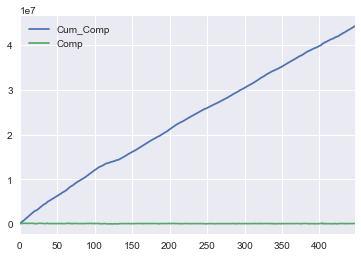

In [18]:
#Checking distribution
plt.figure(); pay_equity3.Cum_Comp.plot(); pay_equity3.Comp.plot(); plt.legend(loc='best')

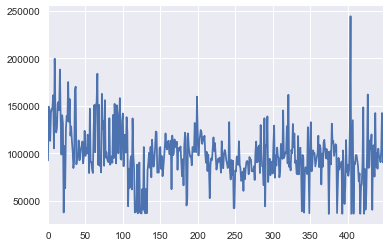

In [19]:
# checking distribution
pay_equity3['Comp'].plot()

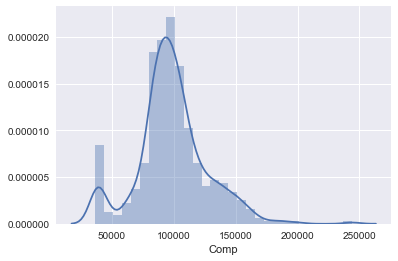

In [20]:
#Distibution plot of Compensation
sns.distplot(pay_equity3['Comp'])

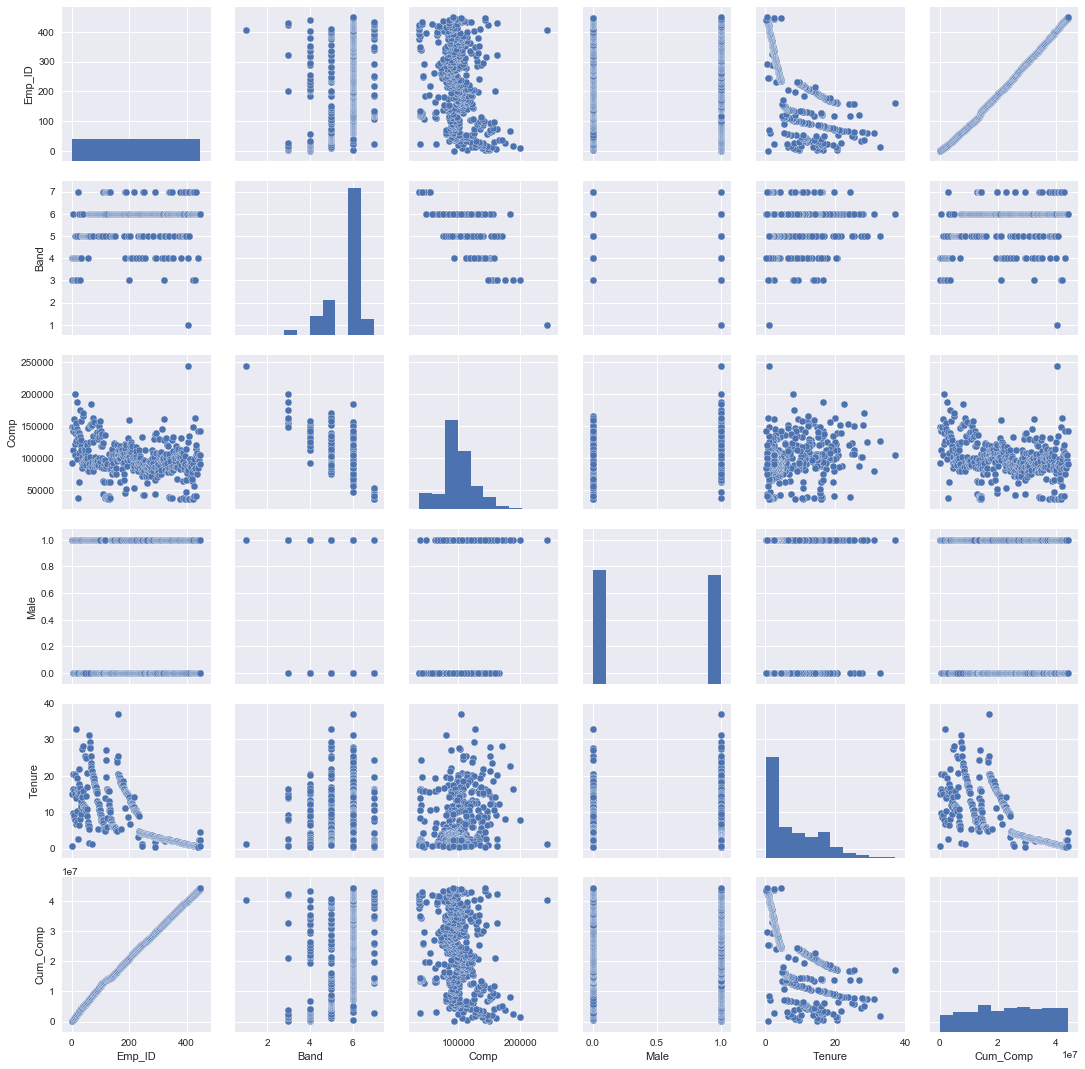

In [21]:
#pair plot of al variables
sns.pairplot(pay_equity3)

In [22]:
#Basic Statistics @@@Descritive Analysis@@@
pay_equity3.describe()

,Emp_ID,Band,Comp,Male,Tenure,Cum_Comp
count,448.000000,448.000000,448.000000,448.000000,448.000000,4.480000e+02
mean,224.500000,5.665179,98695.343824,0.488839,8.085347,2.315796e+07
std,129.470717,0.845804,28632.846447,0.500434,7.124599,1.242371e+07
min,1.000000,1.000000,36564.510080,0.000000,0.369863,9.267936e+04
25%,112.750000,5.000000,84485.103828,0.000000,2.441096,1.319066e+07
50%,224.500000,6.000000,96662.294775,0.000000,5.105479,2.358782e+07
75%,336.250000,6.000000,112340.407850,1.000000,12.928767,3.397989e+07
max,448.000000,7.000000,244075.326500,1.000000,37.013699,4.421551e+07


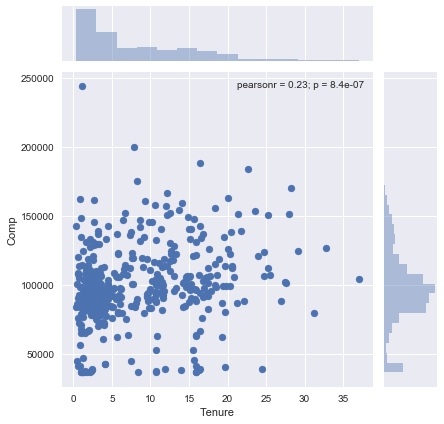

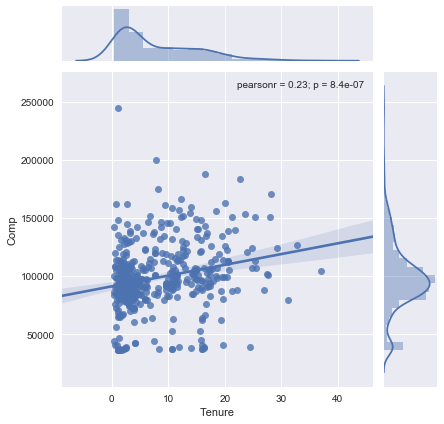

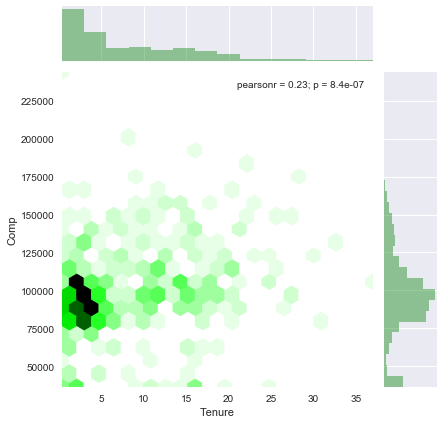

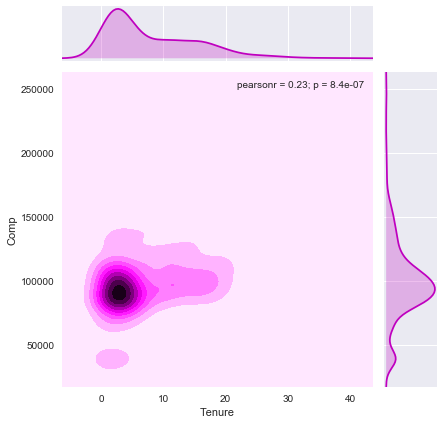

In [23]:
#Joint plot and saving figure in local drive
fig = plt.figure(figsize=[50,50])
sns.jointplot(y="Comp",x="Tenure", data =pay_equity3, kind  ="scatter")
sns.jointplot(y="Comp",x="Tenure", data =pay_equity3, kind  ="reg")
sns.jointplot(y="Comp",x="Tenure", data =pay_equity3, kind  ="hex", color = "g")
sns.jointplot(y="Comp",x="Tenure", data =pay_equity3, kind  ="kde", color = "m")
plt.savefig("C:/Users/JAINMOD/Desktop/Respiratory/Python Learning/Plots/figure.png")

In [24]:
#Descriptive Analysis
pay_equity3['Comp'].describe()


count       448.000000
mean      98695.343824
std       28632.846447
min       36564.510080
25%       84485.103828
50%       96662.294775
75%      112340.407850
max      244075.326500
Name: Comp, dtype: float64

In [25]:
#Null value treatment(replacing nulls with the mean)
pay_equity3 = pay_equity3.fillna(pay_equity3.mean())
pay_equity3

,Emp_ID,Division,Site,Family,Band,Gender,DOJ,Comp,Male,Tenure,Cum_Comp
0,1,PHARMA,CADO,Sales,4,Male,10/24/2016,92679.36127,1,0.791781,9.267936e+04
1,2,PHARMA,CADO,Sales,3,Male,9/9/2002,149186.59570,1,14.926027,2.418660e+05
2,3,PHARMA,CADO,Sales,4,Male,10/9/2007,145547.56730,1,9.841096,3.874135e+05
3,4,PHARMA,CADO,Sales,6,Female,1/6/1997,113265.97200,0,20.602740,5.006795e+05
4,5,PHARMA,CADO,Sales,4,Male,3/5/2001,142829.44750,1,16.441096,6.435089e+05
5,6,PHARMA,CADO,Sales,4,Female,12/15/2008,146712.78210,0,8.654795,7.902217e+05
6,7,PHARMA,CADO,Sales,4,Male,11/26/2001,147855.97120,1,15.712329,9.380777e+05
7,8,SANDOZ,CABV,Sales,3,Male,4/14/2008,161103.65090,1,9.326027,1.099181e+06
8,9,ONCOLOGY,CADO,Sales,5,Female,9/2/2002,105427.81690,0,14.945205,1.204609e+06
9,10,SANDOZ,CABV,Sales,3,Male,9/28/2009,199508.53890,1,7.868493,1.404118e+06


In [26]:
#selecting random location for Taining & Test
from sklearn.datasets import load_boston
boston = load_boston()
boston.data

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [27]:
#creating data frame to convert array based data : Boston and calling the column name
boston_ref=pd.DataFrame(boston.data)
boston_ref.columns=boston.feature_names
boston_ref

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

In [28]:
boston_model = boston_ref.copy()
boston_model['is_train']=np.random.uniform(0,1, len(boston_model))<= .8
pe_train = boston_model.loc[boston_model['is_train']==True,:]
pe_test = boston_model.loc[boston_model['is_train']==False,:]
del boston_model['is_train']
del pe_train['is_train']
del pe_test['is_train']


In [29]:
model = sm.OLS(pe_train.loc[:,'LSTAT'],pe_train.drop('LSTAT', axis = 1, inplace = False)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  LSTAT   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     311.1
Date:                Wed, 09 Aug 2017   Prob (F-statistic):          1.25e-190
Time:                        07:44:44   Log-Likelihood:                -1167.3
No. Observations:                 400   AIC:                             2359.
Df Residuals:                     388   BIC:                             2407.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM           0.1308      0.040      3.248      0.001       0.052       0.210
ZN             0.0098      0.014      0.681      0.497      -0.019       0.038
INDUS          0.0489      0.066      0.737      0.462      -0.082       0.180
CHAS          -0.0827      0.935     -0.088      0.930      -1.922       1.756
NOX           21.5698      3.380      6.381      0.000      14.924      28.216
RM            -2.9322      0.270    -10.858      0.000      -3.463      -2.401
AGE            0.0890      0.013      6.785      0.000       0.063       0.115
DIS            0.6654      0.199      3.352      0.001       0.275       1.056
RAD           -0.1200      0.068     -1.776      0.077      -0.253       0.013
TAX            0.0030      0.004      0.750      0.454      -0.005       0.011
PTRATIO        0.6122      0.108      5.691      0.000       0.401       0.824
B             -0.0054      0.003     -1.886      0.060      -0.011       0.000
==============================================================================
Omnibus:                       33.688   Durbin-Watson:                   1.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.979
Skew:                           0.236   Prob(JB):                     1.20e-27
Kurtosis:                       5.686   Cond. No.                     8.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
#models parameters estimates of all the variables
model.params

CRIM        0.130774
ZN          0.009803
INDUS       0.048946
CHAS       -0.082736
NOX        21.569787
RM         -2.932222
AGE         0.088996
DIS         0.665413
RAD        -0.120029
TAX         0.002976
PTRATIO     0.612154
B          -0.005431
dtype: float64

In [31]:
#Deleting insignificant variables( p(t) >0.05)
model1 = sm.OLS(pe_train.loc[:,'LSTAT'],pe_train.drop(['LSTAT','TAX','RAD','ZN','INDUS','CHAS','B'], axis = 1, inplace = False)).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  LSTAT   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     617.4
Date:                Wed, 09 Aug 2017   Prob (F-statistic):          6.91e-197
Time:                        07:44:44   Log-Likelihood:                -1171.5
No. Observations:                 400   AIC:                             2355.
Df Residuals:                     394   BIC:                             2379.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM           0.1231      0.034      3.672      0.000       0.057       0.189
NOX           21.8372      2.860      7.635      0.000      16.214      27.460
RM            -3.0485      0.240    -12.697      0.000      -3.521      -2.576
AGE            0.0902      0.013      6.938      0.000       0.065       0.116
DIS            0.6908      0.160      4.323      0.000       0.377       1.005
PTRATIO        0.5701      0.088      6.443      0.000       0.396       0.744
==============================================================================
Omnibus:                       34.452   Durbin-Watson:                   1.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.680
Skew:                           0.238   Prob(JB):                     6.92e-29
Kurtosis:                       5.748   Cond. No.                         956.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
pe_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15


In [33]:
pe_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,396.90,13.27


In [34]:
#Creating new variable PREDICTED based on MODEL @@showing error WITH MODEL1@@
test1 = pe_test.copy()
test1['Predicted']= model.predict(test1.drop('LSTAT', axis=1, inplace = False))
test1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Predicted
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,9.110948
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,7.184800
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,7.487938
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,13.788699
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,396.90,13.27,13.201693
30,1.13081,0.0,8.14,0.0,0.538,5.713,94.1,4.2330,4.0,307.0,21.0,360.17,22.60,17.923018
31,1.35472,0.0,8.14,0.0,0.538,6.072,100.0,4.1750,4.0,307.0,21.0,376.73,13.04,17.296184
40,0.03359,75.0,2.95,0.0,0.428,7.024,15.8,5.4011,3.0,252.0,18.3,395.62,1.98,3.963810
53,0.04981,21.0,5.64,0.0,0.439,5.998,21.4,6.8147,4.0,243.0,16.8,396.90,8.43,7.180952
58,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86,9.890398


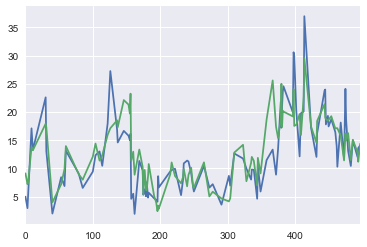

In [35]:
test1['LSTAT'].plot()
test1['Predicted'].plot()

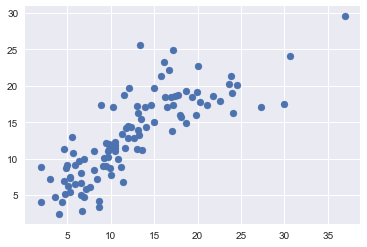

In [36]:
#generating scatter plot b/w actual and predicted @@can we use any other plot too??
plt.scatter(test1['LSTAT'],test1['Predicted'])

mean(|Actual - Predicted|/Actual)

In [37]:
mape = np.mean(np.abs(test1['LSTAT']-test1['Predicted'])/test1['LSTAT'])
print(mape)

0.3196186870291798


In [38]:
#Predicted valuse with model1
test2 = pe_test.copy()
test2['Predicted']= model1.predict(test2.drop(['LSTAT','TAX','RAD','ZN','INDUS','CHAS','B'], axis=1, inplace = False))
test2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Predicted
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,9.135285
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,7.652400
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,7.960529
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,14.129307
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,396.90,13.27,13.584529
30,1.13081,0.0,8.14,0.0,0.538,5.713,94.1,4.2330,4.0,307.0,21.0,360.17,22.60,17.857186
31,1.35472,0.0,8.14,0.0,0.538,6.072,100.0,4.1750,4.0,307.0,21.0,376.73,13.04,17.282567
40,0.03359,75.0,2.95,0.0,0.428,7.024,15.8,5.4011,3.0,252.0,18.3,395.62,1.98,3.526896
53,0.04981,21.0,5.64,0.0,0.439,5.998,21.4,6.8147,4.0,243.0,16.8,396.90,8.43,7.523418
58,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86,10.441712


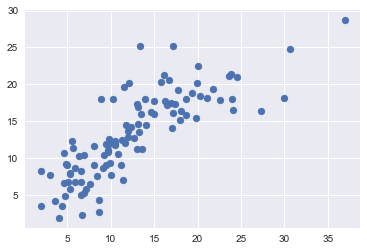

In [39]:
plt.scatter(test2['LSTAT'],test2['Predicted'])

In [40]:
mape = np.mean(np.abs(test2['LSTAT']-test2['Predicted'])/test2['LSTAT'])
print(mape)

0.32112798768213296


Mape has increased even after removing non significant variables. What to do in such scenario?

In [41]:
#K- Fold validations
kf = cross_val.KFold(boston_model.shape[0], k=10)

model ={}
count = 0
mape = {}
for train_index test_index in kf :
    X_train, X_test, y_train, y_test = cross_val.split(train_index, test_index, boston_model.drop('LSTAT', axis=1, inplace = False), boston_model['LSTAT'])
    model[count] = sm.OLS(y_train, X_train).fit()
    mape[count] = np.mean(np.abs(y_test - model[count].predict(X_test))/y_test)
    count+=1

In [42]:
model ={} 
count = 0 
mape = {} 
for train_index, test_index in kf :
    X_train, X_test, y_train, y_test = cross_val.split(train_index, test_index, boston_model.drop('LSTAT', axis=1, inplace = False), boston_model['LSTAT']) 
    model[count] = sm.OLS(y_train, X_train).fit() 
    mape[count] = np.mean(np.abs(y_test - model[count].predict(X_test))/y_test) 
    count+=1

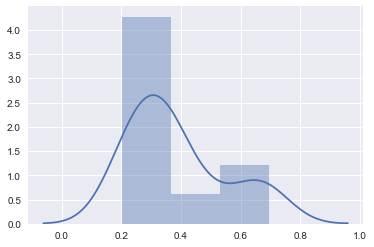

In [43]:
sns.distplot(list(mape.values()))

In [44]:
print('Bias:')
print(np.mean(list(mape.values())))
print()
print('Variance:')
print(np.std(list(mape.values())))
# Hyperparameter Tuning

Bias:
0.385470106694

Variance:
0.156759885244


In [45]:
#Hyper parameter tuning
